$$  \Large \text{Long Assignment - Introdução  à  Ciência de Dados} $$

$$ \text{Nuno Alexandre Carvalho Araújo} $$
$$ \text{Ana Clara Ferreira Cerqueira} $$
$$ \text{Margarida da Conceição Soares Cardeano Pinheiro} $$

# 1. Business Understanding

COVID-19 is an infectious disease caused by SARS-CoV2, the most recently discovered coronavirus, which is infecting large numbers of people worldwide. As a result, many countries’ healthcare systems became overburdened during the COVID-19 pandemic. This was due to a variety of factors, including lack of human and material capital while the demand for healthcare was increasing. 

As time went on, different responses to the virus emerged, due to the adaptive process of the virus.

Medical data is a valuable resource in these emergency situations, not only for clinical decisions but also for health political governance, since it provides up-to-date and real-time information on the pandemic’s progression.

## 1.1 Business Objectives

With information previously collected, including medical data, regarding the characteristics of specific patients, the goal of this project is to improve the identification of high-risk patients using a practical implementation. This will allow a low-complexity and low-cost application that facilitates it's distribution in clinics and hospitals. Therefore, this will accelerate the treatment process and save resources.

## 1.2 Assess Situation

As previously known, the Sars-Cov2 virus is recent and despite its high transmission rate, we can only be sure of what might happen to a patient when we analyze a large-scale data. Therefore we need a complete database that takes into account the clinical history of each patient, among other external factors.

## 1.3 Data Mining Goals

The goal is to generate a computational learning model that analyzes a large number of cases and can predict the outcome or the need for further medical assistance for a person that has been exposed to SARS-CoV-2 and their probability of survival or death. 

The model's success depends on it's sensitivity/specificity for correctly identifying patients who are affected/unaffected by the disease. The higher the sensitivity the more enhanced the detection rate of real cases will be. So, affected patients can receive medical attention in good time.

# 2. Data Understanding

The model will be developed using a dataset from a database containing confirmed and suspected COVID-19 patients in Mexico. These data refer to the period between 04/12/2020 and 04/31/2021, constituting a total of 3,868,396 cases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from IPython.display import display_html
from sklearn.metrics import matthews_corrcoef

In [2]:
dataset = pd.read_csv(r"C:\Users\klaro\Documents\FCUP\MESTRADO\covid19Mexico_Apr2020_Jan2021.csv")

## 2.1 Features Description

In [3]:
data = pd.DataFrame(dataset)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ORIGEN,3779640.0,1.685989,0.464121,1.0,1.0,2.0,2.0,2.0
SECTOR,3779640.0,9.511909,3.569800,1.0,4.0,12.0,12.0,99.0
ENTIDAD_UM,3779640.0,14.286609,7.888192,1.0,9.0,11.0,20.0,32.0
SEXO,3779640.0,1.482816,0.499705,1.0,1.0,1.0,2.0,2.0
ENTIDAD_NAC,3779640.0,15.345633,9.693700,1.0,9.0,13.0,21.0,99.0
ENTIDAD_RES,3779640.0,14.600245,7.820309,1.0,9.0,13.0,20.0,32.0
MUNICIPIO_RES,3779640.0,32.800777,44.318188,1.0,7.0,17.0,39.0,999.0
TIPO_PACIENTE,3779640.0,1.134076,0.340734,1.0,1.0,1.0,1.0,2.0
INTUBADO,3779640.0,84.401300,32.250624,1.0,97.0,97.0,97.0,99.0
NEUMONIA,3779640.0,1.903805,0.327203,1.0,2.0,2.0,2.0,99.0


The table above gives a simplified statistical description of each feature on the dataset.
On this dataset all features are numerical. Most of them are binary and have values from a catalog that describe what each of them represents.

For example, the "ICU" feature, that indicates whether or not the user is admitted to the intensive care unit, is a binary feature. The catalog followed is "SI_NO" and it's value's interpretations are as follows:


 1  - yes 

 2  - no

 97 - not applicable

 98 - is ignored 

 99 - not specified   

## 2.2 Data Exploration

To better understand the raw data and it's features, we will be applying certain measurements and plots in order to analyze distributions and unveil any inconsistencies that might need to be corrected.

### Type of Patient

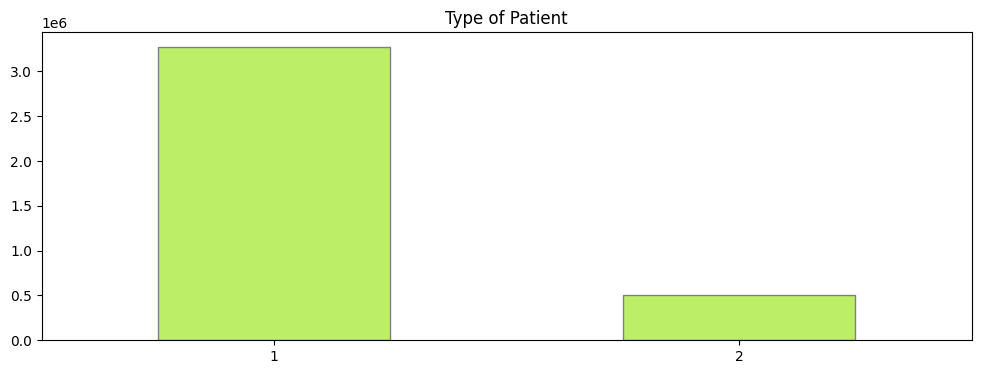

In [4]:
fig, axarr = plt.subplots(1, 1, figsize=(12,4))

data['TIPO_PACIENTE'].value_counts().sort_index().plot.bar(color='#BCEE68',edgecolor ='grey', title = 'Type of Patient', rot=0)

plt.show()

In [5]:
print(data['TIPO_PACIENTE'].value_counts().sort_index())

1    3272882
2     506758
Name: TIPO_PACIENTE, dtype: int64


It is clear from the barplot presented that there is a predominance of ambulatory patients (type 1) over hospitalized patients. Since this attribute is directly associated with the patient's outcome and likelyhood to survive, it is important to note that this dataset is not balanced.

### Patient's Origins

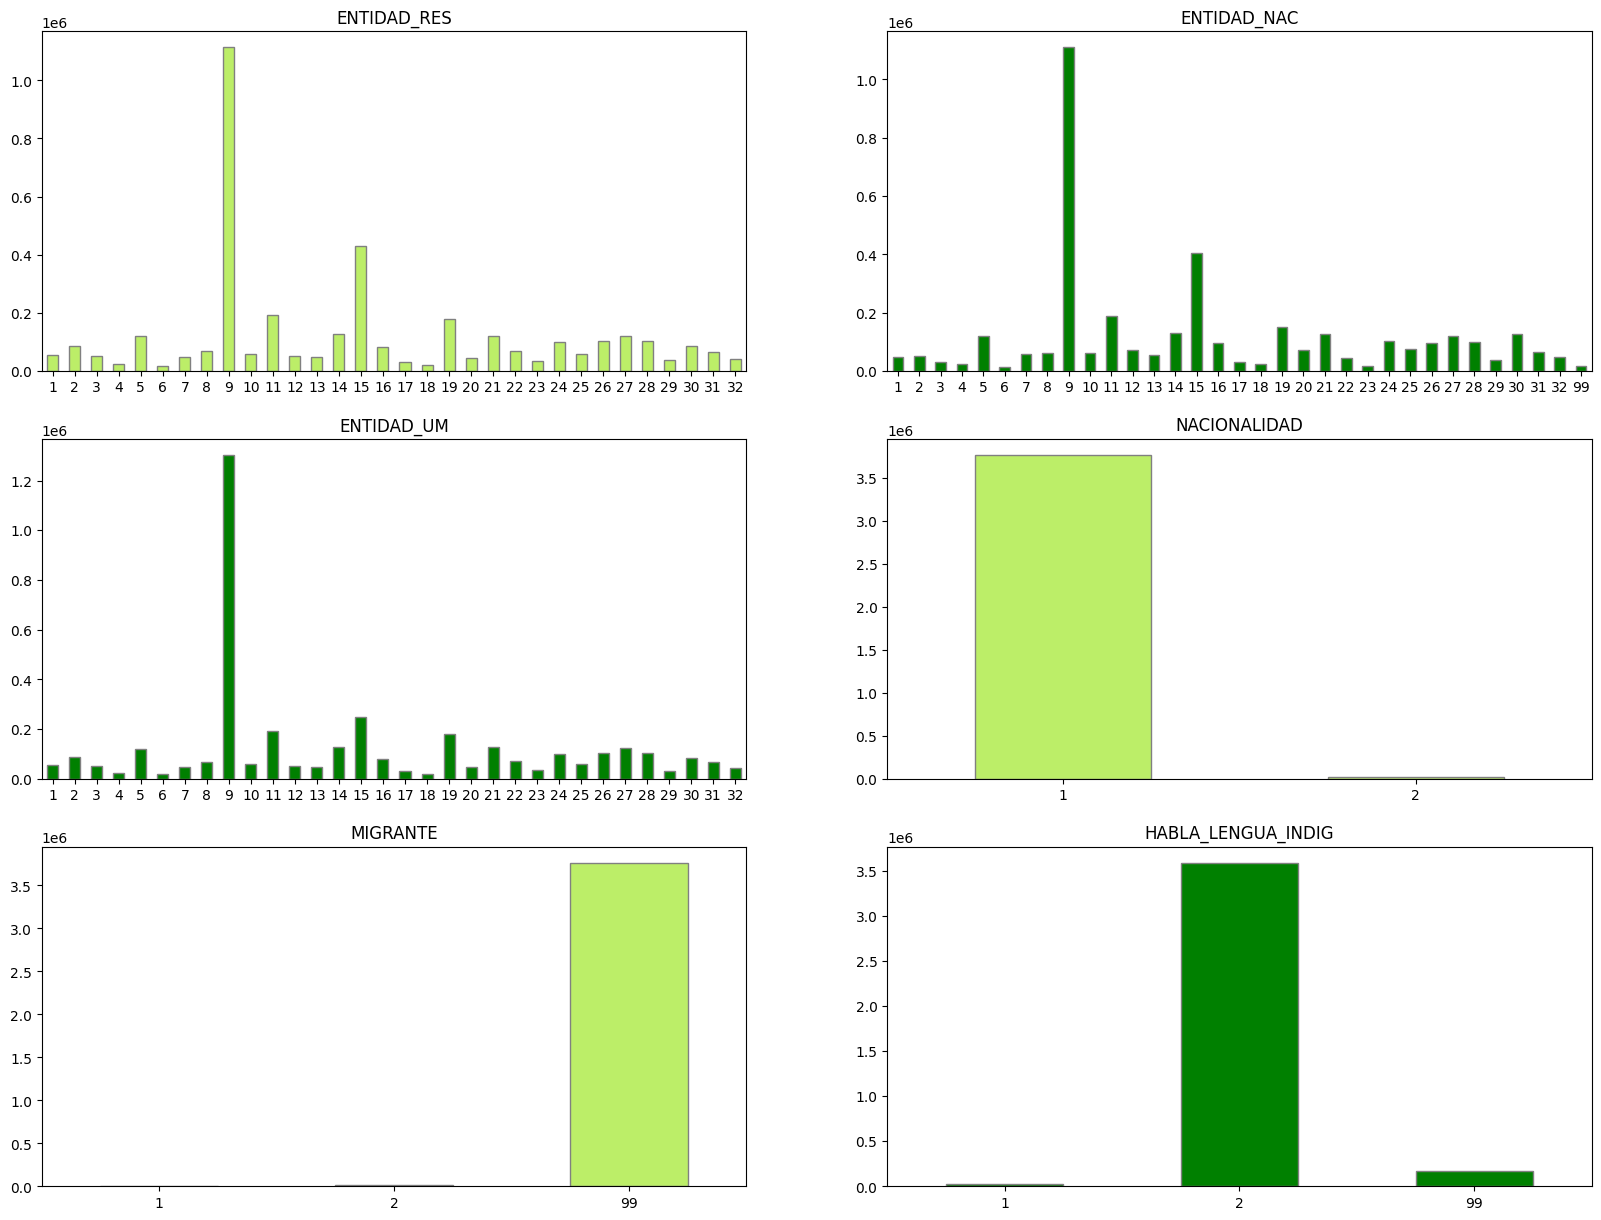

In [6]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 15))

data['ENTIDAD_RES'].value_counts().sort_index().plot.bar(ax=axarr[0,0], color='#BCEE68',edgecolor ='grey', title = 'ENTIDAD_RES', rot=0)
data['ENTIDAD_NAC'].value_counts().sort_index().plot.bar(ax=axarr[0,1], color = 'green',edgecolor ='grey', title = 'ENTIDAD_NAC', rot=0)
data['ENTIDAD_UM'].value_counts().sort_index().plot.bar(ax=axarr[1,0], color = 'green',edgecolor ='grey', title = 'ENTIDAD_UM', rot=0)
data['NACIONALIDAD'].value_counts().sort_index().plot.bar(ax=axarr[1,1], color = '#BCEE68',edgecolor ='grey', title = 'NACIONALIDAD', rot=0)
data['MIGRANTE'].value_counts().sort_index().plot.bar(ax=axarr[2,0], color = '#BCEE68',edgecolor ='grey', title = 'MIGRANTE', rot=0)
data['HABLA_LENGUA_INDIG'].value_counts().sort_index().plot.bar(ax=axarr[2,1], color = 'green',edgecolor ='grey', title = 'HABLA_LENGUA_INDIG', rot=0)

plt.show()

Observing the plots shown, we can see that most of the population of this data is concentrated at the region represented by number 9. Consulting the 'ENTIDADES' catalog we verify that it corresponds to the City of Mexico.

### Age

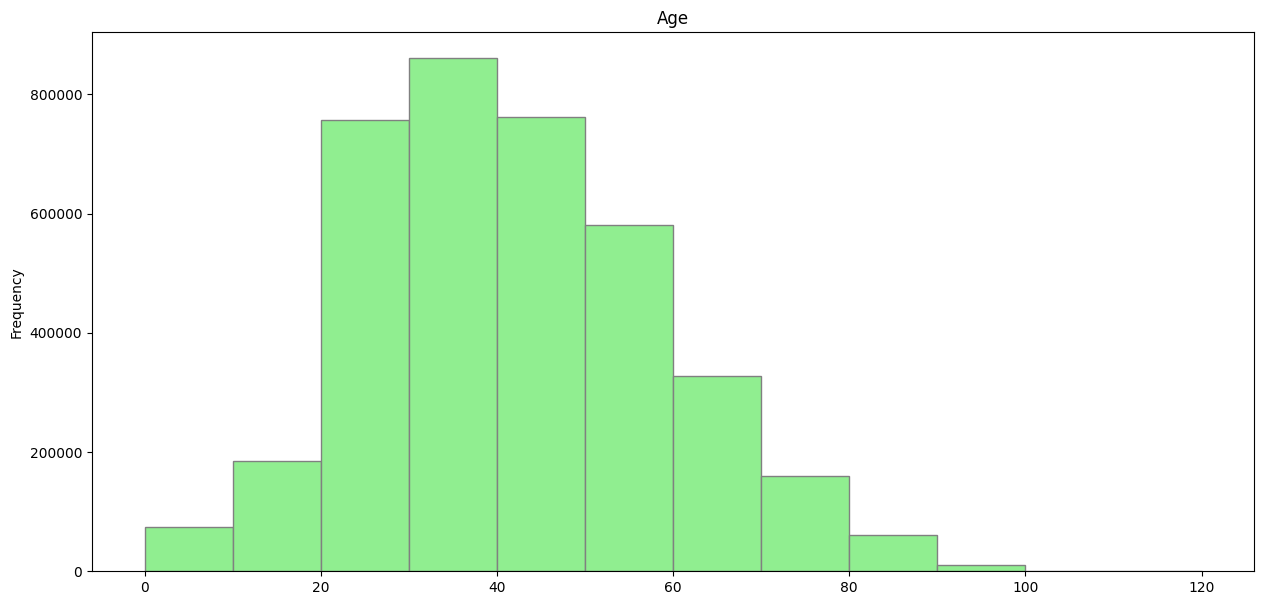

In [7]:
fig, axarr = plt.subplots(1, 1, figsize=(15, 7))

data['EDAD'].plot.hist(bins=12,color='lightgreen',edgecolor ='grey', title = 'Age', rot=0)

plt.show()

With the age barplot presented, we can see that it is close to a normal distribution. Most patients affected by the virus are in the 20-50 age interval and this number gradually decreases from the age of 50 onwards. However, we can't identify a smaller specific age group where the patients are contained.

### Overview of other binary attributes

C:\Users\klaro\AppData\Local\Temp\ipykernel_37360\715079250.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


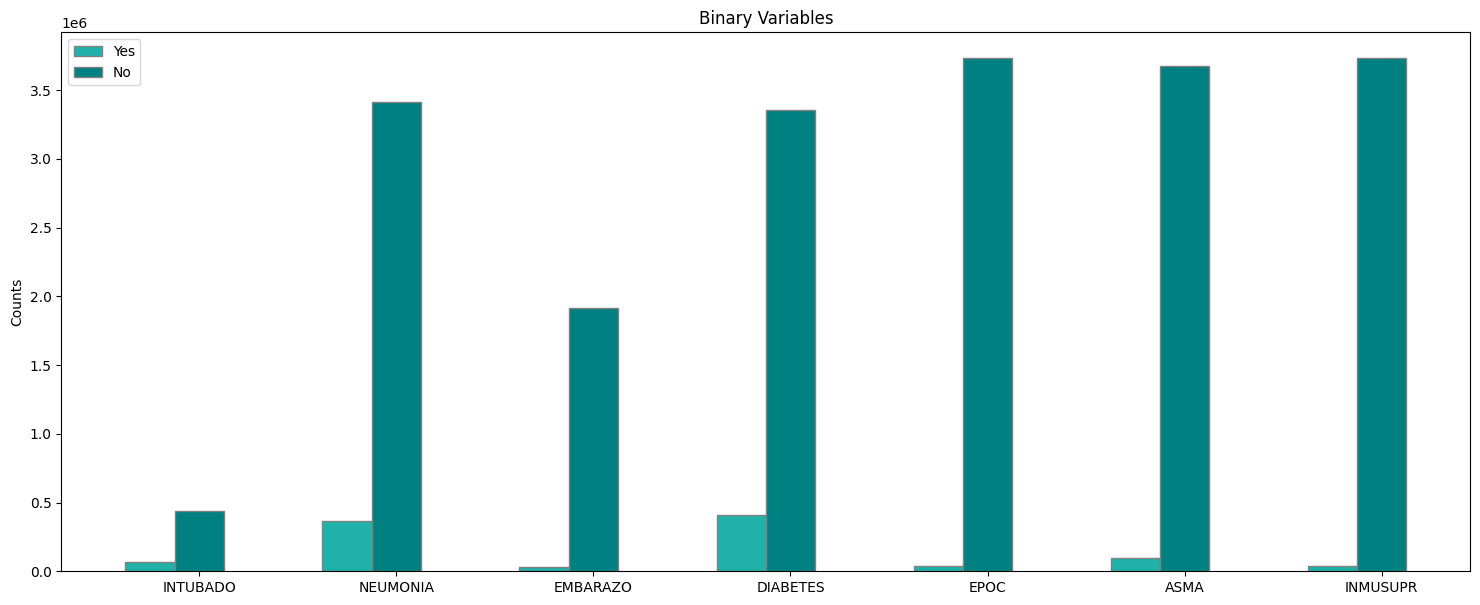

In [8]:
barWidth = 0.25
fig = plt.subplots(figsize =(40, 7))

# set height of bar for train full
ones = [data[data["INTUBADO"] == 1].count()[0], data[data["NEUMONIA"] == 1].count()[0], data[data["EMBARAZO"] == 1].count()[0], data[data["DIABETES"] == 1].count()[0], data[data["EPOC"] == 1].count()[0], data[data["ASMA"] == 1].count()[0], data[data["INMUSUPR"] == 1].count()[0]]
twos = [data[data["INTUBADO"] == 2].count()[0], data[data["NEUMONIA"] == 2].count()[0], data[data["EMBARAZO"] == 2].count()[0], data[data["DIABETES"] == 2].count()[0], data[data["EPOC"] == 2].count()[0], data[data["ASMA"] == 2].count()[0], data[data["INMUSUPR"] == 2].count()[0]]

br1 = np.arange(len(ones))
br2 = [x + barWidth for x in br1]

plt.subplot(1, 2, 1)
plt.bar(br1, ones, color ='lightseagreen', width = barWidth,edgecolor ='grey', label ='Yes')
plt.bar(br2, twos, color ='teal', width = barWidth,edgecolor ='grey', label ='No')
plt.ylabel('Counts')
plt.xticks([r + barWidth for r in range(len(ones))],["INTUBADO", "NEUMONIA", "EMBARAZO", "DIABETES", "EPOC", "ASMA", "INMUSUPR"])
plt.title('Binary Variables')
plt.legend(loc='best')

plt.show()

C:\Users\klaro\AppData\Local\Temp\ipykernel_37360\2292597603.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


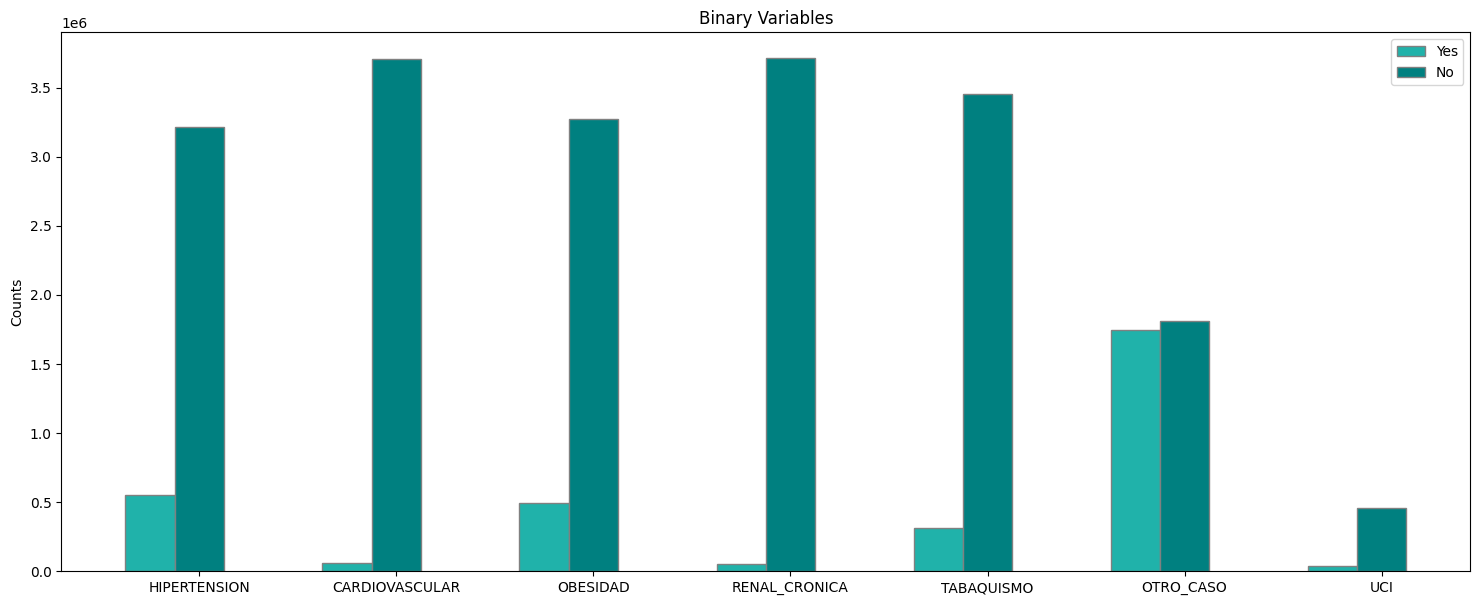

In [9]:
barWidth = 0.25
fig = plt.subplots(figsize =(40, 7))

# set height of bar for train full
ones = [data[data["HIPERTENSION"] == 1].count()[0], data[data["CARDIOVASCULAR"] == 1].count()[0], data[data["OBESIDAD"] == 1].count()[0], data[data["RENAL_CRONICA"] == 1].count()[0], data[data["TABAQUISMO"] == 1].count()[0], data[data["OTRO_CASO"] == 1].count()[0], data[data["UCI"] == 1].count()[0]]
twos = [data[data["HIPERTENSION"] == 2].count()[0], data[data["CARDIOVASCULAR"] == 2].count()[0], data[data["OBESIDAD"] == 2].count()[0], data[data["RENAL_CRONICA"] == 2].count()[0], data[data["TABAQUISMO"] == 2].count()[0], data[data["OTRO_CASO"] == 2].count()[0], data[data["UCI"] == 2].count()[0]]

br1 = np.arange(len(ones))
br2 = [x + barWidth for x in br1]

plt.subplot(1, 2, 1)
plt.bar(br1, ones, color ='lightseagreen', width = barWidth,edgecolor ='grey', label ='Yes')
plt.bar(br2, twos, color ='teal', width = barWidth,edgecolor ='grey', label ='No')
plt.ylabel('Counts')
plt.xticks([r + barWidth for r in range(len(ones))],["HIPERTENSION", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO", "OTRO_CASO", "UCI"])
plt.title('Binary Variables')
plt.legend(loc='best')

plt.show()

### UCI

Text(0, 0.5, 'Counts')

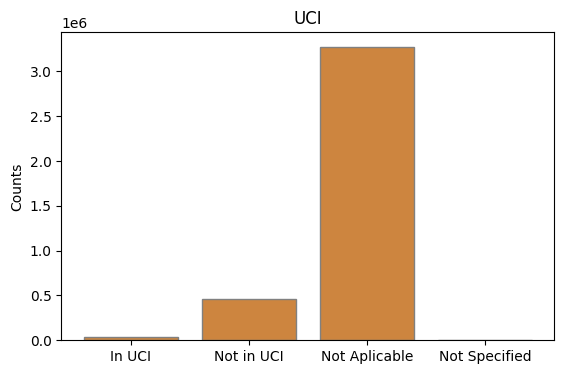

In [10]:
labels = ['In UCI', 'Not in UCI', 'Not Aplicable', 'Not Specified']
x = [data[data['UCI'] == 1].count()[0], data[data['UCI'] == 2].count()[0], data[data['UCI'] == 97].count()[0], data[data['UCI'] == 99].count()[0]]

plt.figure(num=None, figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.bar(labels,x, color='peru',edgecolor ='grey')
plt.title('UCI')
plt.ylabel('Counts')

### Bivariate Analysis

In [11]:
data[['TIPO_PACIENTE','UCI','INTUBADO','NEUMONIA','DIABETES','HIPERTENSION','OBESIDAD','TABAQUISMO','OTRO_CASO']].corr()

,TIPO_PACIENTE,UCI,INTUBADO,NEUMONIA,DIABETES,HIPERTENSION,OBESIDAD,TABAQUISMO,OTRO_CASO
TIPO_PACIENTE,1.000000,-0.992775,-0.992779,-0.601527,-0.002273,-0.003674,0.004657,0.010585,0.227185
UCI,-0.992775,1.000000,0.999986,0.603254,0.002338,0.003683,-0.004684,-0.010539,-0.227265
INTUBADO,-0.992779,0.999986,1.000000,0.603370,0.002345,0.003688,-0.004678,-0.010544,-0.227515
NEUMONIA,-0.601527,0.603254,0.603370,1.000000,-0.001391,-0.000335,-0.006888,-0.010537,-0.144415
DIABETES,-0.002273,0.002338,0.002345,-0.001391,1.000000,0.865277,0.820218,0.818715,0.091182
HIPERTENSION,-0.003674,0.003683,0.003688,-0.000335,0.865277,1.000000,0.857494,0.854958,0.092889
OBESIDAD,0.004657,-0.004684,-0.004678,-0.006888,0.820218,0.857494,1.000000,0.858776,0.099084
TABAQUISMO,0.010585,-0.010539,-0.010544,-0.010537,0.818715,0.854958,0.858776,1.000000,0.102405
OTRO_CASO,0.227185,-0.227265,-0.227515,-0.144415,0.091182,0.092889,0.099084,0.102405,1.000000


<AxesSubplot: title={'center': 'INTUBADO and UCI'}, xlabel='INTUBADO'>

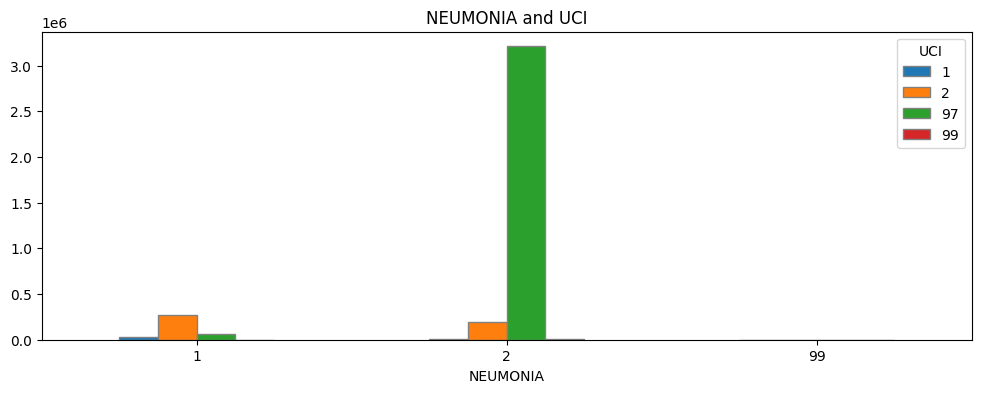

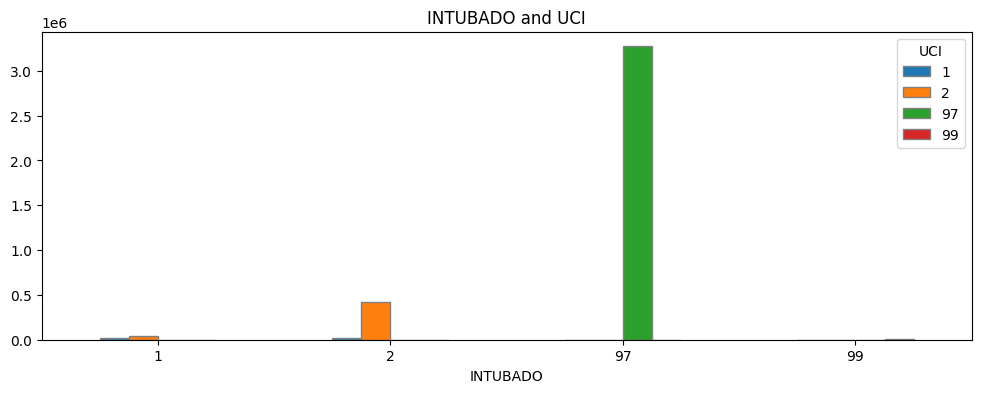

In [12]:
# Cross tabulation between NEUMONIA and UCI
a = pd.crosstab(data['NEUMONIA'],data['UCI'])
a.iloc[:].plot.bar(rot=0,edgecolor ='grey',title='NEUMONIA and UCI',figsize=(12,4))

# Cross tabulation between INTUBADO and UCI
b = pd.crosstab(data['INTUBADO'],data['UCI'])
b.iloc[:].plot.bar(rot=0,edgecolor ='grey',title='INTUBADO and UCI',figsize=(12,4))

### Data Quality

In [13]:
columns = ['INTUBADO', 'NEUMONIA', 'EMBARAZO', 'HABLA_LENGUA_INDIG','DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO','OTRO_CASO','MIGRANTE', 'UCI']
for i in columns:
  print('-',i, '|| Not aplicable:', data[data[i] == 97].count()[0], '| Is ignored', data[data[i] == 98].count()[0],'| Not specified', data[data[i] == 99].count()[0])

- INTUBADO || Not aplicable: 3272882 | Is ignored 0 | Not specified 6063
- NEUMONIA || Not aplicable: 0 | Is ignored 0 | Not specified 8
- EMBARAZO || Not aplicable: 1824872 | Is ignored 12848 | Not specified 4
- HABLA_LENGUA_INDIG || Not aplicable: 0 | Is ignored 0 | Not specified 169114
- DIABETES || Not aplicable: 0 | Is ignored 12053 | Not specified 0
- EPOC || Not aplicable: 0 | Is ignored 11206 | Not specified 0
- ASMA || Not aplicable: 0 | Is ignored 11021 | Not specified 0
- INMUSUPR || Not aplicable: 0 | Is ignored 11343 | Not specified 0
- HIPERTENSION || Not aplicable: 0 | Is ignored 11293 | Not specified 0
- CARDIOVASCULAR || Not aplicable: 0 | Is ignored 11156 | Not specified 0
- OBESIDAD || Not aplicable: 0 | Is ignored 10760 | Not specified 0
- RENAL_CRONICA || Not aplicable: 0 | Is ignored 11014 | Not specified 0
- TABAQUISMO || Not aplicable: 0 | Is ignored 11608 | Not specified 0
- OTRO_CASO || Not aplicable: 0 | Is ignored 0 | Not specified 218494
- MIGRANTE || Not a

# 3. Data Preparation

In [14]:
data.replace(99, np.nan, inplace=True)
data.replace(98, np.nan, inplace=True)
data.replace(97, np.nan, inplace=True)
data.replace('97', np.nan, inplace=True)
data.replace('98', np.nan, inplace=True)
data.replace('99', np.nan, inplace=True)
data.replace('9999-99-99', np.nan, inplace=True)

In [15]:
data.isna().sum()

FECHA_ACTUALIZACION            0
ID_REGISTRO                    0
ORIGEN                         0
SECTOR                        10
ENTIDAD_UM                     0
SEXO                           0
ENTIDAD_NAC                17543
ENTIDAD_RES                    0
MUNICIPIO_RES              23987
TIPO_PACIENTE                  0
FECHA_INGRESO                  0
FECHA_SINTOMAS                 0
FECHA_DEF                3572203
INTUBADO                 3278945
NEUMONIA                       8
EDAD                         983
NACIONALIDAD                   0
EMBARAZO                 1837724
HABLA_LENGUA_INDIG        169114
INDIGENA                  165580
DIABETES                   12053
EPOC                       11206
ASMA                       11021
INMUSUPR                   11343
HIPERTENSION               11293
OTRA_COM                   17044
CARDIOVASCULAR             11156
OBESIDAD                   10760
RENAL_CRONICA              11014
TABAQUISMO                 11608
OTRO_CASO 

Since the total number of cases analyzed is very high, 3 868 396, we will only consider variables with NaN values of less than 5% of the total data. Therefore, we removed all variables with well more than 100 000 NaN's that showed low levels of correlation.

In [16]:
data.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN','ENTIDAD_RES','HABLA_LENGUA_INDIG','ENTIDAD_NAC','ENTIDAD_UM','NACIONALIDAD', 'MIGRANTE'],inplace = True)

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SECTOR,3779630.0,9.511673,3.566836,1.0,4.0,12.0,12.0,13.0
SEXO,3779640.0,1.482816,0.499705,1.0,1.0,1.0,2.0,2.0
MUNICIPIO_RES,3755653.0,32.384962,44.151991,1.0,7.0,17.0,39.0,999.0
TIPO_PACIENTE,3779640.0,1.134076,0.340734,1.0,1.0,1.0,1.0,2.0
INTUBADO,500695.0,1.870879,0.335334,1.0,2.0,2.0,2.0,2.0
NEUMONIA,3779632.0,1.903600,0.295139,1.0,2.0,2.0,2.0,2.0
EDAD,3778657.0,41.268864,16.859974,0.0,29.0,40.0,52.0,120.0
EMBARAZO,1941916.0,1.985145,0.120972,1.0,2.0,2.0,2.0,2.0
INDIGENA,3614060.0,1.990690,0.096038,1.0,2.0,2.0,2.0,2.0
DIABETES,3767587.0,1.891353,0.311196,1.0,2.0,2.0,2.0,2.0
